CBD2/Q.AT+BE+BG+HR+CY+CZ+DE+DK+EE+ES+FI+FR+GR+HU+IE+IT+LT+LU+LV+MT+NL+PL+PT+RO+SE+SI+SK+U2+B0.W0.11._Z._Z.A.F.I3632._Z._Z._Z._Z._Z._Z.PC

Gross non-performing loans and advances [% of total gross loans and advances]
(Gross) Non-performing loans and advances / (Gross) Total loans and advances
Domestic banking groups and stand-alone banks

Yellow cells indicates the max value for the country.
Orange cells indicates the min value for the country.


,AT,BE,BG,CZ,CY,DE,DK,EE,ES,FI,FR,GR,HR,HU,IE,IT,LU,LT,LV,MT,NL,PL,PT,RO,SE,SI,SK,EA,EU
2019-Q4,2.015255,1.994597,12.978454,4.083905,17.871384,1.233065,1.901448,2.508820,3.205578,1.428095,2.536292,35.524336,11.760214,5.308550,4.277527,6.801180,1.712829,4.653962,7.535780,3.264276,1.856287,7.514214,7.450693,4.883422,1.129498,3.659927,4.774937,3.205960,2.781513
2020-Q1,1.884637,1.881785,13.106375,4.032598,18.343627,1.150688,1.726105,2.621051,3.089072,1.487155,2.422108,34.416518,11.419858,5.049785,4.344677,6.539957,1.654305,4.539962,6.907025,3.364525,1.841676,7.673786,7.172949,4.803690,1.057690,3.843849,4.830556,3.046966,2.965826
2020-Q2,1.898203,1.820527,13.569465,4.839502,14.541908,1.225618,1.956266,3.492708,2.992769,1.515281,2.380403,30.870792,11.791628,5.010583,5.118971,6.324856,1.507249,5.274110,11.602208,3.686849,1.887795,7.902523,6.803687,5.192508,1.042503,3.616358,4.742332,2.928229,2.868231
2020-Q3,1.813489,1.747873,12.851789,3.790301,13.375382,1.207117,1.940197,3.227133,2.965640,1.539726,2.337234,29.785926,11.163372,4.774269,5.041928,5.609296,1.645122,5.231792,11.041220,3.634019,1.827612,8.073715,6.479153,4.526668,1.039305,3.405691,4.819948,2.815059,2.763418
2020-Q4,1.881754,1.816845,10.855879,4.307386,11.352496,1.241019,1.933656,2.737269,2.889991,1.502577,2.220726,26.461823,10.666366,4.405769,5.096265,4.412900,1.871737,6.736910,9.852705,3.784063,1.890225,7.500596,5.761049,4.274044,1.016042,3.304608,4.337563,2.632694,2.586539
2021-Q1,1.733367,1.659215,9.359138,3.963606,11.012788,1.168826,1.886798,2.640336,3.044314,1.430378,2.149997,26.050693,10.471960,4.342395,4.526063,4.360846,1.819575,5.583639,8.572512,3.659244,1.752774,7.647180,5.318111,4.646926,0.924632,3.315930,4.311252,2.552000,2.506200
2021-Q2,1.713624,1.598404,9.029231,4.138912,9.503358,1.113822,2.075944,2.327735,3.084286,1.362985,2.085218,16.215781,10.032356,4.129515,4.068817,4.043643,1.767090,4.636578,9.179812,3.801638,1.637494,7.480576,4.985705,4.166517,0.902819,2.720861,4.193925,2.346379,2.321112
2021-Q3,1.645793,1.357908,8.687978,3.699781,7.660439,1.087310,1.905242,2.034382,3.004321,1.262324,1.997881,12.004230,9.591572,3.886580,3.719293,3.878112,1.706188,3.819552,8.726653,3.470871,1.505827,7.292903,4.652152,4.143038,0.876877,2.489845,4.128013,2.195486,2.173899
2021-Q4,1.679798,1.372546,7.927484,2.764189,5.414817,1.089680,1.776948,1.595157,2.999936,1.271784,1.924516,8.588461,9.494161,3.965008,3.482253,3.432225,1.556471,2.993928,8.346461,3.153634,1.390787,6.563392,4.153315,3.627889,1.013724,2.273045,3.839495,2.100545,2.088667
2022-Q1,1.662855,1.256316,7.633030,1.920611,5.594709,1.033236,1.567001,1.440576,2.910196,1.164129,1.848713,8.322526,8.194351,3.941108,3.162173,3.301446,1.509920,3.205845,8.585787,3.334829,1.313653,6.422887,4.089549,3.885053,0.871571,2.161040,4.100199,1.980057,1.962662


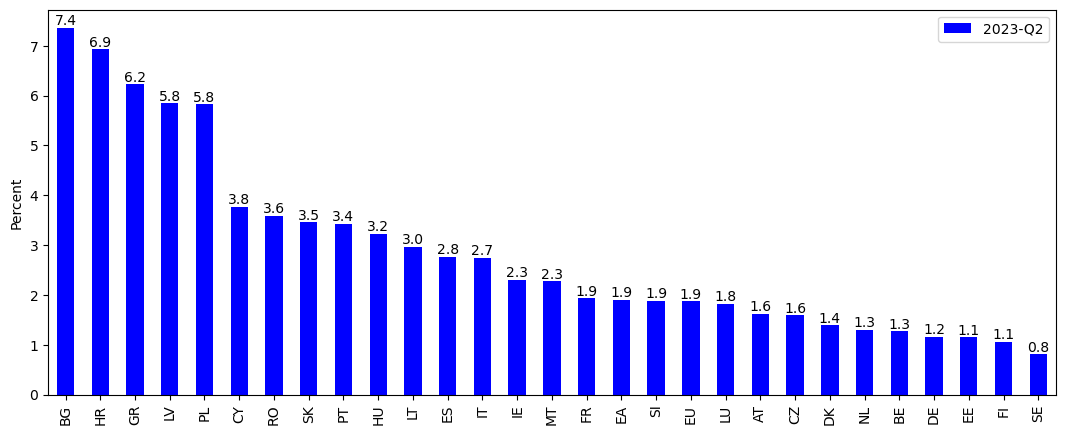

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

series_key2 = 'CBD2/Q.AT+BE+BG+HR+CY+CZ+DE+DK+EE+ES+FI+FR+GR+HU+IE+IT+LT+LU+LV+MT+NL+PL+PT+RO+SE+SI+SK+U2+B0.W0.11._Z._Z.A.F.I3632._Z._Z._Z._Z._Z._Z.PC'
details = f'?format=jsondata'
print(series_key2)

url = 'https://sdw-wsrest.ecb.europa.eu/service/data/'
# headers used as content negotiation to return data in json format
headers = {'Accept':'application/json'}
r = requests.get(f'{url}{series_key2}', headers=headers).json()
#result = r.json()

date_list = r['structure']['dimensions']['observation'][0]['values']
dates = {i: v['id'] for i, v in enumerate(date_list)}
areas = [v['id'] for v in r['structure']['dimensions']['series'][1]['values']]


df = pd.DataFrame()
for i, area in enumerate(areas):
    s_key = f'0:{i}:0:0:0:0:0:0:0:0:0:0:0:0:0:0'
    s_list = r['dataSets'][0]['series'][s_key]['observations']
    df[area] = pd.Series({dates[int(i)]: v[0] for i, v in s_list.items()})

    

#Rename U2 to EA and B0 to EU
df.rename(columns={"B0": "EU"}, inplace=True)
df.rename(columns={"U2": "EA"}, inplace=True)


#prepare dataframe for chart
#df.transpose().round(1)
dfLast=df.tail(1)
dfLastT=dfLast.T
#dfLastTS=dfLastT.sort_values(dfLastT.columns[0], ascending = False)
s = dfLastT.sort_values(dfLastT.columns[0], ascending = False)

#horizontal bar chart
#s.plot(kind='barh', figsize=(13,6), color='blue')

# add value labels to ends of bars and country names to start of bars
ax = s.plot.bar(figsize=(13,5), color='blue')
ax.bar_label(ax.containers[0], fmt='%.1f')
y_title=(r['structure']['dimensions']['series'][15]['values'][0])
plt.ylabel(y_title['name'])

#df=df[['AT','BE','BG','CZ','CY','DE','DK','EE','ES','FI','FR','GR','HR','HU','IE','IT','LU','LT','LV','MT','NL','PL','PT','RO','SE','SI','SK']]

def highlight_max(m):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = m == m.max()
    return ['background-color: red' if v else '' for v in is_max]
print("""""")
t1=(r['structure']['attributes']['series'][13]['values'][0])
print(t1['name'])
t2=(r['structure']['attributes']['series'][6]['values'][0])
print(t2['name'])
t3=(r['structure']['dimensions']['series'][3]['values'][0])
print(t3['name'])
print("""
Yellow cells indicates the max value for the country.
Orange cells indicates the min value for the country.""")
dfconcat=df
dfconcat=dfconcat[['AT','BE','BG','CZ','CY','DE','DK','EE','ES','FI','FR','GR','HR','HU','IE','IT','LU','LT','LV','MT','NL','PL','PT','RO','SE','SI','SK','EA','EU']]
df1=dfconcat.tail(15)
dfTest=df1.style.highlight_min(color = "orange").highlight_max(color = "yellow")
display(dfTest)
